In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nfl_data_py as nfl # package that works with NFL data sourced from nflfastR, nfldata, dynastyprocess, and Draft Scout.

from bs4 import BeautifulSoup
from urllib import request



website = request.urlopen("https://www.pro-football-reference.com/years/2021/fantasy.htm").read()
soup = BeautifulSoup(website, 'lxml')

table = soup.find('table', attrs={'id': 'fantasy','class': 'per_match_toggle'})

table_headers = [header.text for header in table.find('thead').find_all('th')]
table_rows = table.find_all('tr')

player_data = [[td.getText() for tr in table_rows[i].findAll(['td','th'])] for i in table_rows]

print(table_headers)
df = pd.DataFrame(player_data,table_headers)

df.head()

df = pd.DataFrame(df, columns = table_headers)

In [242]:
# fantasy football datasets; results from each season

ff21 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2021.csv', index_col = 0)

ff20 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')

ff19 = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv', index_col = 0)


# team stats and rankings from each game per season

team19 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2019_NFL_COMBINE.csv", index_col = 0)
team20 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2020_NFL_COMBINE.csv", index_col = 0)
team21 = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/2021_NFL_COMBINE.csv", index_col = 0)

# Incoming rookie data

rosters = nfl.import_rosters([2019])

rosters19 = nfl.import_rosters([2019], ['team', 'player_name','position', 'player_id', 'height', 'weight', 'years_exp', 'rookie_year'])

rosters20 = nfl.import_rosters([2020], ['team', 'player_name', 'position', 'player_id', 'height', 'weight', 'years_exp', 'rookie_year'])

rosters21 = nfl.import_rosters([2021], ['team', 'player_name', 'position', 'player_id', 'height', 'weight', 'years_exp', 'rookie_year'])


# PFF Data (OL rankings, etc)


# Injury Data?
# contract data? years in the league? 


In [243]:
rosters19.loc[rosters19['rookie_year'] == 2019]

,team,player_name,position,player_id,height,weight,years_exp,rookie_year
17,ARI,Byron Murphy,DB,00-0035236,71,190.0,0.0,2019.0
18,ARI,Deionte Thompson,DB,00-0035532,73,196.0,0.0,2019.0
20,ARI,Jalen Thompson,DB,00-0035705,71,190.0,0.0,2019.0
36,ARI,Michael Dogbe,DL,00-0035541,75,284.0,0.0,2019.0
39,ARI,Miles Brown,DL,00-0035486,74,320.0,0.0,2019.0
...,...,...,...,...,...,...,...,...
3451,WAS,Caleb Wilson,TE,00-0035320,76,240.0,0.0,2019.0
3453,WAS,Hale Hentges,TE,00-0035025,76,245.0,0.0,2019.0
3466,WAS,Terry McLaurin,WR,00-0035659,72,210.0,0.0,2019.0
3467,WAS,Kelvin Harmon,WR,00-0035297,74,213.0,0.0,2019.0


## Data Cleaning

### Fantasy Points DataSources

In [244]:
ff21.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,Cooper Kupp*+,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,Deebo Samuel*+,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0


In [245]:
ff19.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,142.0,116.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20,0.0,1.0,0.0
1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0
2,Derrick Henry,TEN,RB,25.0,15.0,15.0,24.0,18.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60,0.0,5.0,3.0
3,Aaron Jones,GNB,RB,25.0,16.0,16.0,68.0,49.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80,0.0,3.0,2.0
4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,71.0,54.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70,0.0,3.0,2.0


In [246]:
team19.head()

,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,1,Sun,8-Sep,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,...,2.0,21.0,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers
1,2,Sun,15-Sep,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,...,1.0,14.0,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers
2,3,Sun,22-Sep,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,...,5.0,11.0,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers
3,4,NaN,NaN,NaN,Bye Week,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco 49ers
4,5,Mon,7-Oct,W,Cleveland Browns,31.0,3.0,22.0,446.0,171.0,...,NaN,9.0,180.0,78.0,102.0,4.0,12.38,22.56,-10.50,San Francisco 49ers


Need to clean player name from *, + and/or both.

Need to group by position, as points scored and value is dependent on position.

need a dataset of predictor variables for final -- previous year's players (2021) plus rookies (2022) draft.

Need to bring in a dataset of rookies 

Need a dataset of team ranks from previous year (2021)

We'll use 19 and 20 as training years; 21 as test year. 

Final model will use previous 2 season data, and other, to predict upcoming season data


In [247]:
ff21.dtypes


Player            object
Tm                object
Pos               object
Age                int64
G                  int64
GS                 int64
Tgt              float64
Rec              float64
PassingYds       float64
PassingTD        float64
PassingAtt       float64
RushingYds       float64
RushingTD        float64
RushingAtt       float64
ReceivingYds     float64
ReceivingTD      float64
FantasyPoints    float64
Int              float64
Fumbles          float64
FumblesLost      float64
dtype: object

In [248]:
# cleaning player names

ff21['Player'] = ff21['Player'].str.replace("+","", regex = True)
ff21['Player'] = ff21['Player'].str.replace("*","", regex = True)

ff20['Player'] = ff20['Player'].str.replace("+","", regex = True)
ff20['Player'] = ff20['Player'].str.replace("*","", regex = True)

ff19['Player'] = ff19['Player'].str.replace("+","", regex = True)
ff19['Player'] = ff19['Player'].str.replace("*","", regex = True)



## Roster data

Now that fantasy points for 3 seasons are relatively cleaned; before merging, let's try to clean up roster data

In [249]:
rosters19.sample(n=8)

,team,player_name,position,player_id,height,weight,years_exp,rookie_year
65,ARI,Max Garcia,OL,00-0032132,76,309.0,4.0,2015.0
1161,DET,Cole Herdman,TE,00-0035109,76,245.0,NaN,NaN
1264,GB,Teo Redding,WR,00-0034647,None,176.0,NaN,NaN
2759,PHI,Halapoulivaati Vaitai,OL,00-0032785,78,320.0,3.0,2016.0
1869,LAC,Cole Toner,OL,00-0032787,77,310.0,NaN,NaN
3143,TB,Kentrell Brice,DB,00-0032628,None,200.0,NaN,NaN
1603,JAX,Dede Westbrook,WR,00-0033839,72,176.0,2.0,2017.0
3418,WAS,Brandon Scherff,OL,00-0032053,77,315.0,NaN,NaN


In [250]:
# We must get rid of non-offensive, fantasy irrelevant positions

# for this analysis, only focused on qb, rb, wr, te

ff_positions = ['QB', 'RB', 'WR', 'TE']

rosters19_rel = rosters19.loc[rosters19['position'].isin(ff_positions)]
rosters20_rel = rosters20.loc[rosters20['position'].isin(ff_positions)]
rosters21_rel = rosters21.loc[rosters21['position'].isin(ff_positions)]

In [251]:
ff19.shape

(620, 20)

In [252]:
ff19_r = pd.merge(rosters19_rel, ff19, how = 'inner', left_on = rosters19_rel['player_name'], right_on = ff19['Player'], suffixes = ('_19r', '_19')).reset_index(drop = True)

ff19_r.head()

,key_0,team,player_name,position,player_id,height,weight,years_exp,rookie_year,Player,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Brett Hundley,ARI,Brett Hundley,QB,00-0031589,75,226.0,4.0,2015.0,Brett Hundley,...,11.0,41.0,0.0,7.0,0.0,0.0,6.06,0.0,0.0,0.0
1,Kyler Murray,ARI,Kyler Murray,QB,00-0035228,70,207.0,0.0,2019.0,Kyler Murray,...,542.0,544.0,4.0,93.0,0.0,0.0,279.28,12.0,5.0,2.0
2,Alfred Morris,ARI,Alfred Morris,RB,00-0029141,70,222.0,NaN,NaN,Alfred Morris,...,0.0,4.0,0.0,1.0,0.0,0.0,0.40,0.0,0.0,0.0
3,David Johnson,ARI,David Johnson,RB,00-0032187,73,224.0,4.0,2015.0,David Johnson,...,0.0,345.0,2.0,94.0,370.0,4.0,141.50,0.0,1.0,1.0
4,Kenyan Drake,ARI,Kenyan Drake,RB,00-0033118,73,211.0,3.0,2016.0,Kenyan Drake,...,0.0,817.0,8.0,170.0,345.0,0.0,212.20,0.0,2.0,1.0


In [253]:
# there may be duplicates in this

rosters20_rel.loc[rosters20_rel['player_name'].duplicated() == True]

,team,player_name,position,player_id,height,weight,years_exp,rookie_year
2674,SF,Chris Thompson,WR,00-0033855,72,175,3.0,2017.0
2738,TB,Ryan Griffin,QB,00-0029857,77,210,7.0,2013.0


In [254]:
# dropping duplicates here

rosters20_rel = rosters20_rel.drop_duplicates(subset = ['player_name'], keep = 'first')
ff20 = ff20.drop_duplicates(subset = ['Player'], keep = 'first')

In [255]:
ff20_r = pd.merge(rosters20_rel, ff20, how = 'inner', left_on = rosters20_rel['player_name'], right_on = ff20['Player'], suffixes = ('_20r', '_20')).reset_index(drop = True)

ff20_r.sample(5)

,key_0,team,player_name,position,player_id,height,weight,years_exp,rookie_year,Player,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
230,Randall Cobb,HOU,Randall Cobb,WR,00-0028002,70,192,9.0,2011.0,Randall Cobb,...,1,0,0,0,441,3,62.0,0,0,0
544,Mike Evans,TB,Mike Evans,WR,00-0031408,77,231,6.0,2014.0,Mike Evans,...,0,0,0,0,1006,13,179.0,0,0,0
467,Alshon Jeffery,PHI,Alshon Jeffery,WR,00-0029137,75,218,8.0,2012.0,Alshon Jeffery,...,0,0,0,0,115,1,18.0,0,0,0
466,DeSean Jackson,PHI,DeSean Jackson,WR,00-0026189,70,175,12.0,2008.0,DeSean Jackson,...,0,12,0,1,236,1,31.0,0,0,0
100,J.P. Holtz,CHI,J.P. Holtz,TE,00-0032986,75,240,4.0,2016.0,J.P. Holtz,...,0,0,0,0,0,0,NaN,0,0,0


In [256]:
ff21_r = pd.merge(rosters21_rel, ff21, how = 'inner', left_on = rosters21_rel['player_name'], right_on = ff21['Player'], suffixes = ('_21r', '_21')).reset_index(drop = True)

ff21_r.sample(5)

,key_0,team,player_name,position,player_id,height,weight,years_exp,rookie_year,Player,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
561,Mohamed Sanu,SF,Mohamed Sanu,WR,00-0029632,74,215,9,2012.0,Mohamed Sanu,...,0.0,0.0,0.0,0.0,177.0,0.0,18.0,0.0,0.0,0.0
91,Shi Smith,CAR,Shi Smith,WR,00-0036572,70,190,0,2021.0,Shi Smith,...,0.0,-3.0,0.0,1.0,104.0,0.0,10.0,0.0,0.0,0.0
553,Trenton Cannon,SF,Trenton Cannon,RB,00-0034164,71,185,3,2018.0,Trenton Cannon,...,0.0,4.0,0.0,3.0,0.0,0.0,-2.0,0.0,1.0,1.0
99,Khalil Herbert,CHI,Khalil Herbert,RB,00-0036906,69,212,0,2021.0,Khalil Herbert,...,0.0,433.0,2.0,103.0,96.0,0.0,65.0,0.0,1.0,0.0
37,Josh Johnson,SEA,Josh Johnson,RB,00-0036799,69,208,0,2021.0,Josh Johnson,...,85.0,28.0,0.0,9.0,0.0,0.0,46.0,2.0,2.0,0.0


### merging all 3 years together

Now, let's merge these dataframes on Player_id

In [257]:
# concatenating data frames

ff_all = pd.merge(ff19_r, ff20_r, how = 'outer', left_on = ff19_r['player_id'], right_on = ff20_r['player_id'], suffixes = ('_19', '_20')).reset_index(drop = True)

ff_all.head()

,key_0,key_0_19,team_19,player_name_19,position_19,player_id_19,height_19,weight_19,years_exp_19,rookie_year_19,...,PassingAtt_20,RushingYds_20,RushingTD_20,RushingAtt_20,ReceivingYds_20,ReceivingTD_20,FantasyPoints_20,Int_20,Fumbles_20,FumblesLost_20
0,00-0031589,Brett Hundley,ARI,Brett Hundley,QB,00-0031589,75,226.0,4.0,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00-0035228,Kyler Murray,ARI,Kyler Murray,QB,00-0035228,70,207.0,0.0,2019.0,...,558.0,819.0,11.0,133.0,0.0,0.0,379.0,12.0,9.0,4.0
2,00-0029141,Alfred Morris,ARI,Alfred Morris,RB,00-0029141,70,222.0,NaN,NaN,...,0.0,238.0,1.0,55.0,19.0,1.0,38.0,0.0,0.0,0.0
3,00-0032187,David Johnson,ARI,David Johnson,RB,00-0032187,73,224.0,4.0,2015.0,...,0.0,691.0,6.0,147.0,314.0,2.0,147.0,0.0,2.0,1.0
4,00-0033118,Kenyan Drake,ARI,Kenyan Drake,RB,00-0033118,73,211.0,3.0,2016.0,...,0.0,955.0,10.0,239.0,137.0,0.0,167.0,0.0,3.0,1.0


In [258]:
# first, adding suffix to 21
ff21_r = ff21_r.add_suffix('_21')



In [259]:
# concatenating data frames (19+20 with 21)

ff21_r['key_0'] = ff21_r['player_id_21']

ff_all = ff_all.merge(ff21_r, on = 'key_0')

ff_all.sample(10)

,key_0,key_0_19,team_19,player_name_19,position_19,player_id_19,height_19,weight_19,years_exp_19,rookie_year_19,...,PassingAtt_21,RushingYds_21,RushingTD_21,RushingAtt_21,ReceivingYds_21,ReceivingTD_21,FantasyPoints_21,Int_21,Fumbles_21,FumblesLost_21
349,00-0034867,Malik Turner,SEA,Malik Turner,WR,00-0034867,74,200.0,1.0,2018.0,...,0.0,0.0,0.0,0.0,149.0,3.0,33.0,0.0,0.0,0.0
364,00-0031503,Jameis Winston,TB,Jameis Winston,QB,00-0031503,76,231.0,4.0,2015.0,...,161.0,166.0,1.0,32.0,0.0,0.0,117.0,3.0,2.0,1.0
277,00-0035624,N'Keal Harry,NE,N'Keal Harry,WR,00-0035624,76,225.0,0.0,2019.0,...,0.0,0.0,0.0,0.0,184.0,0.0,16.0,0.0,1.0,1.0
191,00-0034301,Darrel Williams,KC,Darrel Williams,RB,00-0034301,71,224.0,NaN,NaN,...,0.0,558.0,6.0,144.0,452.0,2.0,149.0,0.0,0.0,0.0
14,00-0030465,Kenjon Barner,ATL,Kenjon Barner,RB,00-0030465,69,195.0,6.0,2013.0,...,0.0,0.0,0.0,4.0,0.0,0.0,NaN,0.0,0.0,0.0
461,00-0036096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,37.0,2.0,19.0,8.0,0.0,15.0,0.0,1.0,1.0
404,00-0035993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188.0,294.0,2.0,47.0,0.0,0.0,83.0,4.0,4.0,3.0
437,00-0036069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,13.0,0.0,6.0,9.0,0.0,2.0,0.0,0.0,0.0
98,00-0034854,KhaDarel Hodge,CLE,KhaDarel Hodge,WR,00-0034854,74,205.0,1.0,2018.0,...,0.0,0.0,0.0,0.0,157.0,0.0,18.0,0.0,0.0,0.0
226,00-0035432,Jason Moore,LAC,Jason Moore,WR,00-0035432,74,215.0,0.0,2019.0,...,0.0,0.0,0.0,0.0,56.0,0.0,6.0,0.0,0.0,0.0


After the merges, let's ensure the columns are all relevant and no duplicate information

In [260]:
ff_all.shape

(504, 88)

In [261]:
ff_all.columns

Index(['key_0', 'key_0_19', 'team_19', 'player_name_19', 'position_19',
       'player_id_19', 'height_19', 'weight_19', 'years_exp_19',
       'rookie_year_19', 'Player_19', 'Tm_19', 'Pos_19', 'Age_19', 'G_19',
       'GS_19', 'Tgt_19', 'Rec_19', 'PassingYds_19', 'PassingTD_19',
       'PassingAtt_19', 'RushingYds_19', 'RushingTD_19', 'RushingAtt_19',
       'ReceivingYds_19', 'ReceivingTD_19', 'FantasyPoints_19', 'Int_19',
       'Fumbles_19', 'FumblesLost_19', 'key_0_20', 'team_20', 'player_name_20',
       'position_20', 'player_id_20', 'height_20', 'weight_20', 'years_exp_20',
       'rookie_year_20', 'Player_20', 'Tm_20', 'Pos_20', 'Age_20', 'G_20',
       'GS_20', 'Tgt_20', 'Rec_20', 'PassingYds_20', 'PassingTD_20',
       'PassingAtt_20', 'RushingYds_20', 'RushingTD_20', 'RushingAtt_20',
       'ReceivingYds_20', 'ReceivingTD_20', 'FantasyPoints_20', 'Int_20',
       'Fumbles_20', 'FumblesLost_20', 'key_0_21', 'team_21', 'player_name_21',
       'position_21', 'player_id_21', '

In [262]:
ff_all = ff_all.loc[:,~ff_all.apply(lambda x: x.duplicated(),axis=1).all()].copy()

In [263]:
ff_all.columns

Index(['key_0', 'key_0_19', 'team_19', 'position_19', 'height_19', 'weight_19',
       'years_exp_19', 'rookie_year_19', 'Tm_19', 'Pos_19', 'Age_19', 'G_19',
       'GS_19', 'Tgt_19', 'Rec_19', 'PassingYds_19', 'PassingTD_19',
       'PassingAtt_19', 'RushingYds_19', 'RushingTD_19', 'RushingAtt_19',
       'ReceivingYds_19', 'ReceivingTD_19', 'FantasyPoints_19', 'Int_19',
       'Fumbles_19', 'FumblesLost_19', 'key_0_20', 'team_20', 'position_20',
       'height_20', 'weight_20', 'years_exp_20', 'rookie_year_20', 'Tm_20',
       'Pos_20', 'Age_20', 'G_20', 'GS_20', 'Tgt_20', 'Rec_20',
       'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'RushingYds_20',
       'RushingTD_20', 'RushingAtt_20', 'ReceivingYds_20', 'ReceivingTD_20',
       'FantasyPoints_20', 'Int_20', 'Fumbles_20', 'FumblesLost_20', 'team_21',
       'position_21', 'height_21', 'weight_21', 'years_exp_21',
       'rookie_year_21', 'Tm_21', 'Pos_21', 'Age_21', 'G_21', 'GS_21',
       'Tgt_21', 'Rec_21', 'PassingYds_21'

## Feature Engineering

Main Data Frame is set! Let's see if we can create new features

In [264]:
# Create a rookie year column [1 if yes; 0 if no]
# so, if 2019 and 2020 are null, and 2021 is not null, then rookie in '21
# so on for 2020

## NEED TO FIX THIS, or use dif data to see if rookie or not

# ff_all['rookie21'] = np.where(ff_all['years_exp_21', 1, 0)
# ff_all['rookie20'] = np.where((ff_all['Tm_19'].isnull() & ff_all['Tm_20'].notnull()), 1, 0)

# ff_all.head()

## THIS WAS TAKEN CARE OF WITH NEW DATASET

In [265]:
# add in new variables -- 

# percentage of games started in 19 and 20.

ff_all['pct_gs19'] = ff_all['GS_19'] / ff_all['G_19']
ff_all['pct_gs20'] = ff_all['GS_20'] / ff_all['G_20']

# rushing yards per attempt each year

ff_all['avg_per_rush19'] = ff_all['RushingYds_19'] / ff_all['RushingAtt_19']
ff_all['avg_per_rush20'] = ff_all['RushingYds_20'] / ff_all['RushingAtt_20']

# rec yards per catch each year

ff_all['avg_per_catch19'] = ff_all['ReceivingYds_19'] / ff_all['Rec_19']
ff_all['avg_per_catch20'] = ff_all['ReceivingYds_20'] / ff_all['Rec_20']

# rec yards per target each year

ff_all['avg_per_tgt19'] = ff_all['ReceivingYds_19'] / ff_all['Tgt_19']
ff_all['avg_per_tgt20'] = ff_all['ReceivingYds_20'] / ff_all['Tgt_20']

# total touches 

ff_all['ttl_touch19'] = ff_all['RushingAtt_19'] + ff_all['Rec_19']
ff_all['ttl_touch20'] = ff_all['RushingAtt_20'] + ff_all['Rec_20']

# total opportunities
# defining opportunity as a target, rushing attempt and passing attempt

ff_all['ttl_opp19'] = ff_all['RushingAtt_19'] + ff_all['Tgt_19'] + ff_all['PassingAtt_19']
ff_all['ttl_opp20'] = ff_all['RushingAtt_20'] + ff_all['Tgt_20'] + ff_all['PassingAtt_20']


# total opportunities per game

ff_all['ttl_opp_per_game19'] = ff_all['ttl_opp19'] / ff_all['G_19']
ff_all['ttl_opp_per_game20'] = ff_all['ttl_opp20'] / ff_all['G_20']

# yards per opportunity

ff_all['yds_per_opp19'] = (ff_all['ReceivingYds_19'] + ff_all['RushingYds_19'] + ff_all['PassingYds_19']) / ff_all['ttl_opp19']
ff_all['yds_per_opp20'] = (ff_all['ReceivingYds_20'] + ff_all['RushingYds_20'] + ff_all['PassingYds_20']) / ff_all['ttl_opp20']

# touchdowns per opportunity

ff_all['td_per_opp19'] = (ff_all['ReceivingTD_19'] + ff_all['RushingTD_19'] + ff_all['PassingTD_19']) / ff_all['ttl_opp19']
ff_all['td_per_opp20'] = (ff_all['ReceivingTD_20'] + ff_all['RushingTD_20'] + ff_all['PassingTD_20']) / ff_all['ttl_opp20']


# turnovers per opportunity

ff_all['turnover_per_opp19'] = (ff_all['Int_19'] + ff_all['FumblesLost_19']) / ff_all['ttl_opp19']
ff_all['turnover_per_opp20'] = (ff_all['Int_20'] + ff_all['FumblesLost_20']) / ff_all['ttl_opp20']

# fantasy points per opportunity

ff_all['fp_per_opp19'] = ff_all['FantasyPoints_19'] / ff_all['ttl_opp19']
ff_all['fp_per_opp20'] = ff_all['FantasyPoints_20'] / ff_all['ttl_opp20']

# fantasy points per game

ff_all['fp_per_gm19'] = ff_all['FantasyPoints_19'] / ff_all['G_19']
ff_all['fp_per_gm20'] = ff_all['FantasyPoints_20'] / ff_all['G_20']
ff_all['fp_per_gm21'] = ff_all['FantasyPoints_21'] / ff_all['G_21']


# if rookie year

ff_all['rookie19'] = np.where(ff_all['years_exp_19'] == 0, 1, 0)
ff_all['rookie20'] = np.where(ff_all['years_exp_20'] == 0, 1, 0)
ff_all['rookie21'] = np.where(ff_all['years_exp_21'] == 0, 1, 0)

# Half-ppr scoring

ff_all['FantasyPoints_19hppr'] = ff_all['FantasyPoints_19'] + (.5 * ff_all['Rec_19'])
ff_all['FantasyPoints_20hppr'] = ff_all['FantasyPoints_20'] + (.5 * ff_all['Rec_20'])
ff_all['FantasyPoints_21hppr'] = ff_all['FantasyPoints_21'] + (.5 * ff_all['Rec_21'])

# fantasy points per game, hppr

ff_all['fp_per_gm19hppr'] = ff_all['FantasyPoints_19hppr'] / ff_all['G_19']
ff_all['fp_per_gm20hppr'] = ff_all['FantasyPoints_20hppr'] / ff_all['G_20']
ff_all['fp_per_gm21hppr'] = ff_all['FantasyPoints_21hppr'] / ff_all['G_21']


In [266]:
ff_all.columns

Index(['key_0', 'key_0_19', 'team_19', 'position_19', 'height_19', 'weight_19',
       'years_exp_19', 'rookie_year_19', 'Tm_19', 'Pos_19',
       ...
       'fp_per_gm21', 'rookie19', 'rookie20', 'rookie21',
       'FantasyPoints_19hppr', 'FantasyPoints_20hppr', 'FantasyPoints_21hppr',
       'fp_per_gm19hppr', 'fp_per_gm20hppr', 'fp_per_gm21hppr'],
      dtype='object', length=112)

In [267]:
# creating DF with only most of 21's stats gone, only with '21 fantasy points and fp/game, as that will be what we're predicting
# getting rid of other repetitive columns

ff_all_19_20 = ff_all.drop(['Age_19', 'Pos_19', 'Pos_20', 'Age_20', 
                           'G_21', 'GS_21', 'Tgt_21', 'Rec_21', 'PassingYds_21', 'PassingTD_21', 'PassingAtt_21', 'RushingYds_21', 
                            'RushingTD_21', 'RushingAtt_21', 'ReceivingYds_21', 'ReceivingTD_21',
                           'Int_21', 'Fumbles_21', 'FumblesLost_21'], axis = 1)

ff_all_19_20 = ff_all_19_20.rename(columns={'key_0' : 'player_id', 'key_0_19': 'player_name'})

In [268]:
# split up by position

ff_rb = ff_all_19_20.loc[ff_all['Pos_21'] == 'RB']
ff_wr = ff_all_19_20.loc[ff_all['Pos_21'] == 'WR']
ff_qb = ff_all_19_20.loc[ff_all['Pos_21'] == 'QB']
ff_te = ff_all_19_20.loc[ff_all['Pos_21'] == 'TE']

Data is now separated by position; with stats from 2019, 2020, and 2021 all under each name.

Another thought -- should there be a minimum games played to be on?

Let's make each position simpler, with the more relevant stats kept for each position.

### For all: 
    - key_0, Age_21, Pos_21, Tm_19, Tm_20, Tm_21, pct_GS_19 (Create new variable), pct_GS_20 (create new variable)
### RB:

    - all but PassingYds_19, PassingTD_19, etc. Player_19, Player_20, Player_21
    
### WR:
    - same as RB
    
### QB: 
    - all but receiving 
    
### TE:
    - all but rushing and passing


In [269]:
ff_rb.columns

Index(['player_id', 'player_name', 'team_19', 'position_19', 'height_19',
       'weight_19', 'years_exp_19', 'rookie_year_19', 'Tm_19', 'G_19', 'GS_19',
       'Tgt_19', 'Rec_19', 'PassingYds_19', 'PassingTD_19', 'PassingAtt_19',
       'RushingYds_19', 'RushingTD_19', 'RushingAtt_19', 'ReceivingYds_19',
       'ReceivingTD_19', 'FantasyPoints_19', 'Int_19', 'Fumbles_19',
       'FumblesLost_19', 'key_0_20', 'team_20', 'position_20', 'height_20',
       'weight_20', 'years_exp_20', 'rookie_year_20', 'Tm_20', 'G_20', 'GS_20',
       'Tgt_20', 'Rec_20', 'PassingYds_20', 'PassingTD_20', 'PassingAtt_20',
       'RushingYds_20', 'RushingTD_20', 'RushingAtt_20', 'ReceivingYds_20',
       'ReceivingTD_20', 'FantasyPoints_20', 'Int_20', 'Fumbles_20',
       'FumblesLost_20', 'team_21', 'position_21', 'height_21', 'weight_21',
       'years_exp_21', 'rookie_year_21', 'Tm_21', 'Pos_21', 'Age_21',
       'FantasyPoints_21', 'pct_gs19', 'pct_gs20', 'avg_per_rush19',
       'avg_per_rush20', 'avg_

In [270]:
# let's make simpler 

ff_rb_pts = ff_rb.drop(['PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'Int_19',
                        'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'Int_20'], axis = 1)

ff_wr_pts = ff_wr.drop(['PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'Int_19',
                          'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'Int_20'], axis = 1)

ff_qb_pts = ff_qb.drop(['Tgt_19', 'Rec_19', 'ReceivingYds_19', 'ReceivingTD_19',
                       'Tgt_20', 'Rec_20', 'ReceivingYds_20', 'ReceivingTD_20',
                       'avg_per_catch19', 'avg_per_catch20', 'avg_per_tgt19', 'avg_per_tgt20'], axis = 1)


ff_te_pts = ff_te.drop(['PassingYds_19', 'PassingTD_19', 'PassingAtt_19', 'Int_19',
                        'PassingYds_20', 'PassingTD_20', 'PassingAtt_20', 'Int_20',
                       'RushingYds_19', 'RushingAtt_19', 'RushingTD_19', 'avg_per_rush19', 'avg_per_rush20'], axis = 1)



In [271]:
ff_rb_pts.head()

,player_id,player_name,team_19,position_19,height_19,weight_19,years_exp_19,rookie_year_19,Tm_19,G_19,...,fp_per_gm21,rookie19,rookie20,rookie21,FantasyPoints_19hppr,FantasyPoints_20hppr,FantasyPoints_21hppr,fp_per_gm19hppr,fp_per_gm20hppr,fp_per_gm21hppr
1,00-0032187,David Johnson,ARI,RB,73,224.0,4.0,2015.0,ARI,13.0,...,3.769231,0,0,0,159.50,163.5,65.0,12.269231,13.625000,5.000000
2,00-0033118,Kenyan Drake,ARI,RB,73,211.0,3.0,2016.0,2TM,14.0,...,6.083333,0,0,0,237.20,179.5,88.0,16.942857,11.966667,7.333333
3,00-0034681,Chase Edmonds,ARI,RB,69,210.0,1.0,2018.0,ARI,13.0,...,8.333333,0,0,0,88.80,141.5,121.5,6.830769,8.843750,10.125000
14,00-0030465,Kenjon Barner,ATL,RB,69,195.0,6.0,2013.0,ATL,14.0,...,NaN,0,0,0,12.12,NaN,NaN,0.865714,NaN,NaN
15,00-0031285,Devonta Freeman,ATL,RB,68,206.0,5.0,2014.0,ATL,14.0,...,7.062500,0,0,0,227.10,32.5,130.0,16.221429,6.500000,8.125000


## Data Exploration

### QB

Text(0, 0.5, 'RB Fantasy points per game current season (2021)')

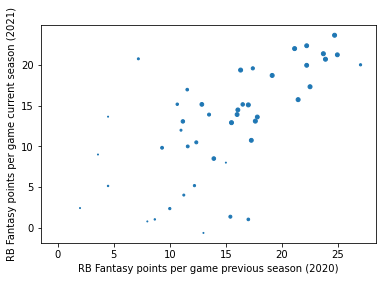

In [272]:
plt.scatter(ff_qb_pts['fp_per_gm20'], ff_qb_pts['fp_per_gm21'], s = ff_qb_pts['GS_20'])
# plt.legend(handles =ff_qb_pts['GS_20'] , loc=2) ## Need to figure out how to add a good legend in
plt.xlabel('RB Fantasy points per game previous season (2020)')
plt.ylabel('RB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

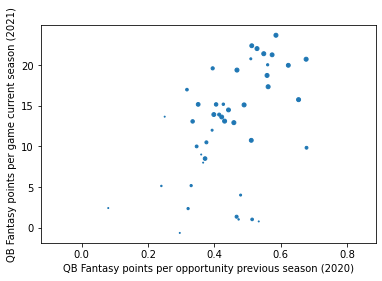

In [273]:
plt.scatter(ff_qb_pts['fp_per_opp20'], ff_qb_pts['fp_per_gm21'], s= ff_qb_pts['GS_20'])
plt.xlabel('QB Fantasy points per opportunity previous season (2020)')
plt.ylabel('QB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points in previous season (2020)')

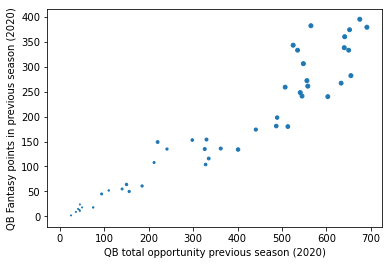

In [274]:
plt.scatter(ff_qb_pts['ttl_opp20'], ff_qb_pts['FantasyPoints_20'], ff_qb_pts['GS_20'])
plt.xlabel('QB total opportunity previous season (2020)')
plt.ylabel('QB Fantasy points in previous season (2020)')

Text(0, 0.5, 'QB Fantasy points in previous season (2020)')

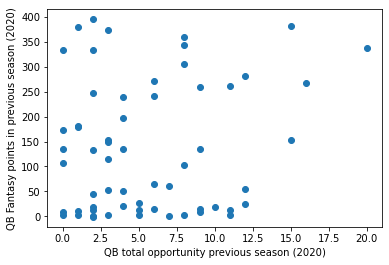

In [275]:
plt.scatter(ff_qb_pts['years_exp_20'], ff_qb_pts['FantasyPoints_20'] )
plt.xlabel('QB total opportunity previous season (2020)')
plt.ylabel('QB Fantasy points in previous season (2020)')

<AxesSubplot:>

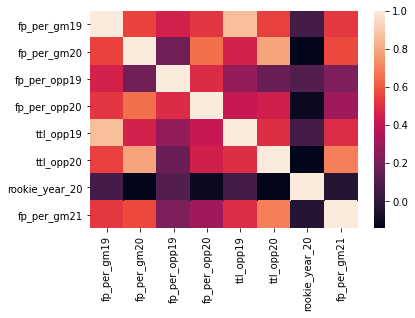

In [276]:
sns.heatmap(ff_qb_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20',
                       'rookie_year_20',
                       'fp_per_gm21']].corr())

### RB

Text(0, 0.5, 'RB Fantasy points per game current season (2021)')

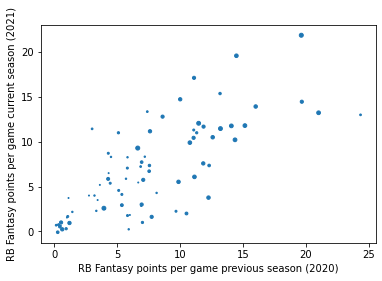

In [277]:
plt.scatter(ff_rb_pts['fp_per_gm20'], ff_rb_pts['fp_per_gm21'], s = ff_rb_pts['GS_20'])
# plt.legend(ff_rb_pts['GS_20']) ## Need to figure out how to add a good legend in
plt.xlabel('RB Fantasy points per game previous season (2020)')
plt.ylabel('RB Fantasy points per game current season (2021)')

The players with possibly most value are the ones lower on the x axis, but higher on y axis

Text(0, 0.5, 'RB Fantasy points per game current season (2021)')

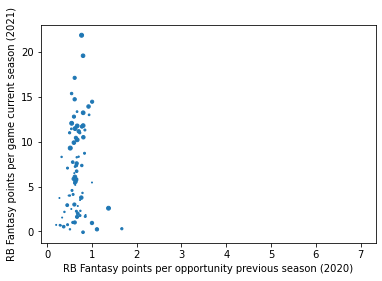

In [278]:
plt.scatter(ff_rb_pts['fp_per_opp20'], ff_rb_pts['fp_per_gm21'], ff_rb_pts['GS_20'])
plt.xlabel('RB Fantasy points per opportunity previous season (2020)')
plt.ylabel('RB Fantasy points per game current season (2021)')

There appear to be some outliers in fantasy points per opportunity

Text(0, 0.5, 'RB Fantasy points in previous season (2020)')

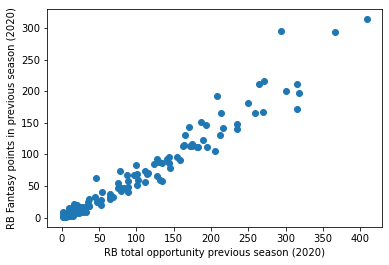

In [279]:
plt.scatter(ff_rb_pts['ttl_opp20'], ff_rb_pts['FantasyPoints_20'])
plt.xlabel('RB total opportunity previous season (2020)')
plt.ylabel('RB Fantasy points in previous season (2020)')

Text(0, 0.5, 'RB Fantasy points in season(2020)')

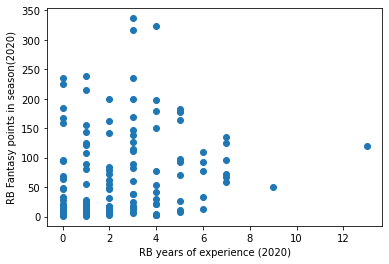

In [280]:
plt.scatter(ff_rb_pts['years_exp_20'], ff_rb_pts['FantasyPoints_20hppr'] )
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Standard Fantasy points in season(2020)')

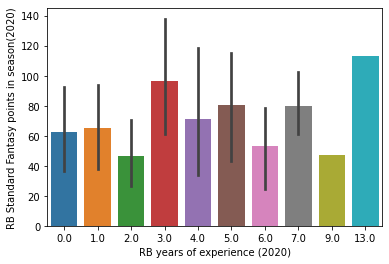

In [281]:
sns.barplot(ff_rb_pts['years_exp_20'], ff_rb_pts['FantasyPoints_20'] )
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB Standard Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Half-ppr Fantasy points in season(2020)')

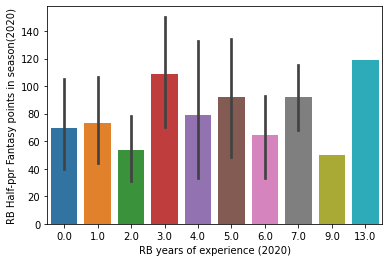

In [282]:
sns.barplot(ff_rb_pts['years_exp_20'], ff_rb_pts['FantasyPoints_20hppr'] )
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB Half-ppr Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Fantasy points per game in season(2020)')

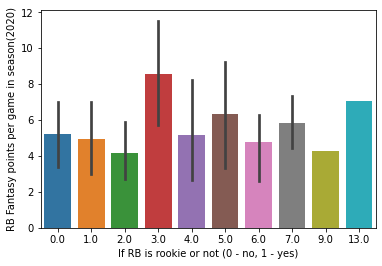

In [283]:
sns.barplot(ff_rb_pts['years_exp_20'], ff_rb_pts['fp_per_gm20'] )
plt.xlabel('If RB is rookie or not (0 - no, 1 - yes)')
plt.ylabel('RB Fantasy points per game in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Fantasy points per game in season(2020)')

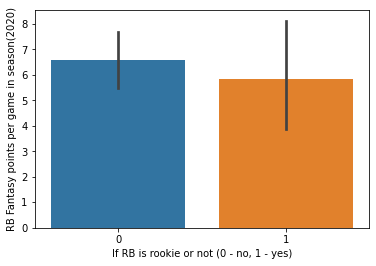

In [284]:
sns.barplot(ff_rb_pts['rookie20'], ff_rb_pts['fp_per_gm20hppr'] )
plt.xlabel('If RB is rookie or not (0 - no, 1 - yes)')
plt.ylabel('RB Fantasy points per game in season(2020)')

<AxesSubplot:>

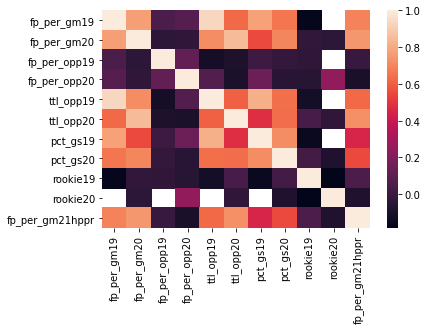

In [285]:
sns.heatmap(ff_rb_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 
                       'pct_gs19', 'pct_gs20', 'rookie19',
                       'rookie20',
                       'fp_per_gm21hppr']].corr())

### WR

Text(0, 0.5, 'WR Fantasy points per game current season (2021)')

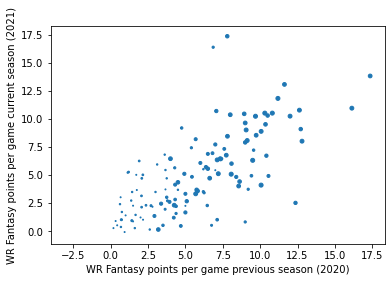

In [286]:
plt.scatter(ff_wr_pts['fp_per_gm20'], ff_wr_pts['fp_per_gm21'], s = ff_wr_pts['GS_20'])
plt.xlabel('WR Fantasy points per game previous season (2020)')
plt.ylabel('WR Fantasy points per game current season (2021)')

Text(0, 0.5, 'WR Fantasy points per game current season (2021)')

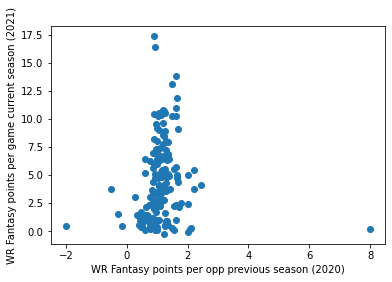

In [287]:
plt.scatter(ff_wr_pts['fp_per_opp20'], ff_wr_pts['fp_per_gm21'])
plt.xlabel('WR Fantasy points per opp previous season (2020)')
plt.ylabel('WR Fantasy points per game current season (2021)')

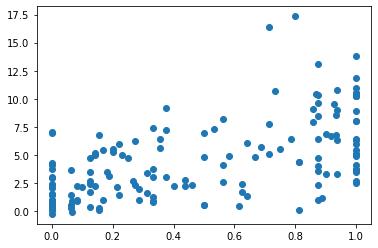

In [288]:
plt.scatter(ff_wr_pts['pct_gs20'], ff_wr_pts['fp_per_gm21'])

Text(0, 0.5, 'WR Fantasy points in previous season (2020)')

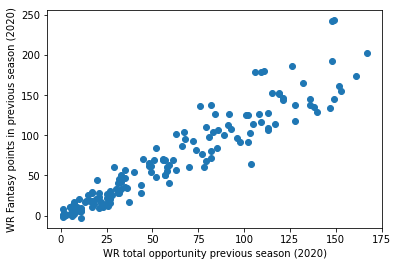

In [289]:
plt.scatter(ff_wr_pts['ttl_opp20'], ff_wr_pts['FantasyPoints_20'])
plt.xlabel('WR total opportunity previous season (2020)')
plt.ylabel('WR Fantasy points in previous season (2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points in season(2019)')

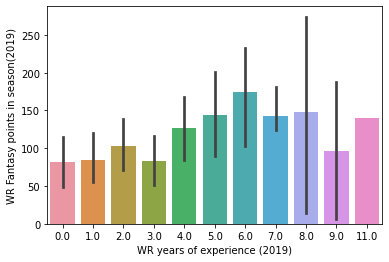

In [290]:
sns.barplot(ff_wr_pts['years_exp_19'], ff_wr_pts['FantasyPoints_19'])
plt.xlabel('WR years of experience (2019)')
plt.ylabel('WR Fantasy points in season(2019)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points in season(2020)')

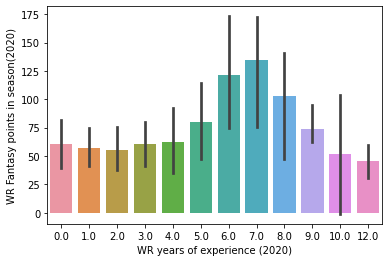

In [291]:
sns.barplot(ff_wr_pts['years_exp_20'], ff_wr_pts['FantasyPoints_20'] )
plt.xlabel('WR years of experience (2020)')
plt.ylabel('WR Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points per game in season(2020)')

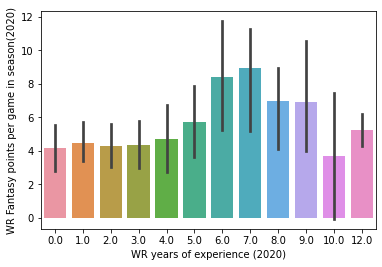

In [292]:
sns.barplot(ff_wr_pts['years_exp_20'], ff_wr_pts['fp_per_gm20'] )
plt.xlabel('WR years of experience (2020)')
plt.ylabel('WR Fantasy points per game in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points in season(2020)')

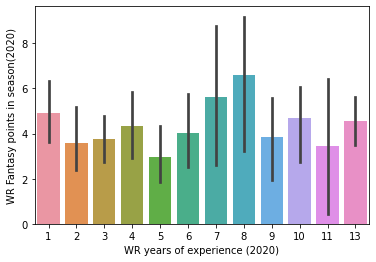

In [293]:
sns.barplot(ff_wr_pts['years_exp_21'], ff_wr_pts['fp_per_gm21'] )
plt.xlabel('WR years of experience (2020)')
plt.ylabel('WR Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points per game in season(2020)')

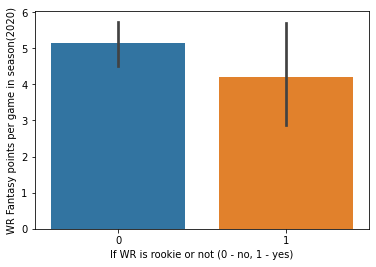

In [294]:
sns.barplot(ff_wr_pts['rookie20'], ff_wr_pts['fp_per_gm20'] )
plt.xlabel('If WR is rookie or not (0 - no, 1 - yes)')
plt.ylabel('WR Fantasy points per game in season(2020)')

<AxesSubplot:>

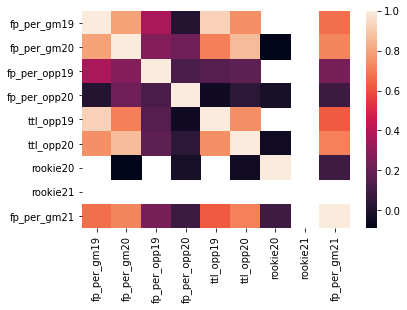

In [295]:
sns.heatmap(ff_wr_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 'rookie20',
                       'rookie21',
                       'fp_per_gm21']].corr())

### TE

Text(0, 0.5, 'TE Fantasy points per game current season (2021)')

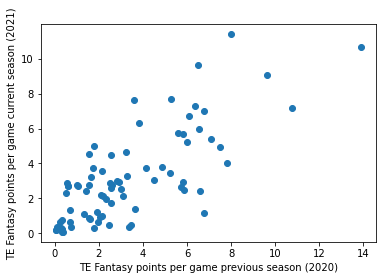

In [296]:
plt.scatter(ff_te_pts['fp_per_gm20'], ff_te_pts['fp_per_gm21'])
plt.xlabel('TE Fantasy points per game previous season (2020)')
plt.ylabel('TE Fantasy points per game current season (2021)')

Text(0, 0.5, 'TE Fantasy points per game current season (2021)')

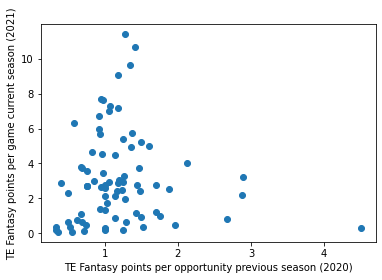

In [297]:
plt.scatter(ff_te_pts['fp_per_opp20'], ff_te_pts['fp_per_gm21'])
plt.xlabel('TE Fantasy points per opportunity previous season (2020)')
plt.ylabel('TE Fantasy points per game current season (2021)')

Text(0, 0.5, 'TE Fantasy points previous season (2020)')

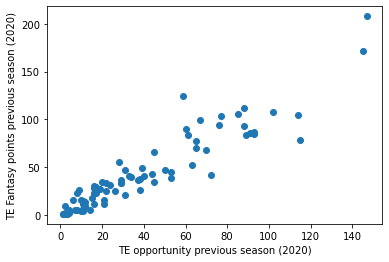

In [298]:
plt.scatter(ff_te_pts['ttl_opp20'], ff_te_pts['FantasyPoints_20'])
plt.xlabel('TE opportunity previous season (2020)')
plt.ylabel('TE Fantasy points previous season (2020)')

Text(0, 0.5, 'TE Fantasy points previous season (2020)')

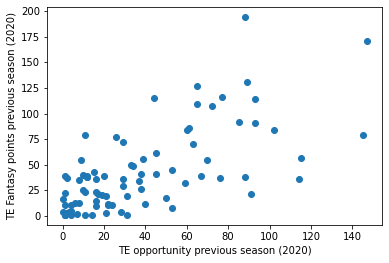

In [299]:
plt.scatter(ff_te_pts['ttl_opp20'], ff_te_pts['FantasyPoints_21'])
plt.xlabel('TE opportunity previous season (2020)')
plt.ylabel('TE Fantasy points previous season (2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'TE Fantasy points in season(2020)')

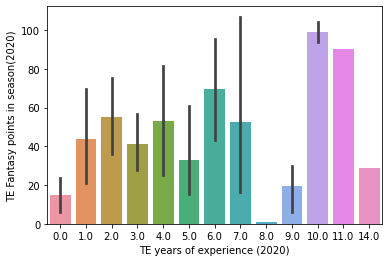

In [300]:
sns.barplot(ff_te_pts['years_exp_20'], ff_te_pts['FantasyPoints_20'] )
plt.xlabel('TE years of experience (2020)')
plt.ylabel('TE Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'TE Fantasy points in season(2020)')

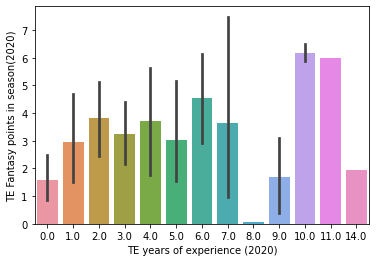

In [301]:
sns.barplot(ff_te_pts['years_exp_20'], ff_te_pts['fp_per_gm20'] )
plt.xlabel('TE years of experience (2020)')
plt.ylabel('TE Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'TE Fantasy points per game in season(2020)')

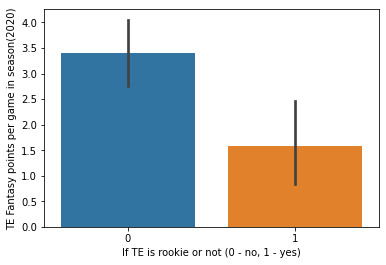

In [302]:
sns.barplot(ff_te_pts['rookie20'], ff_te_pts['fp_per_gm20'] )
plt.xlabel('If TE is rookie or not (0 - no, 1 - yes)')
plt.ylabel('TE Fantasy points per game in season(2020)')

<AxesSubplot:>

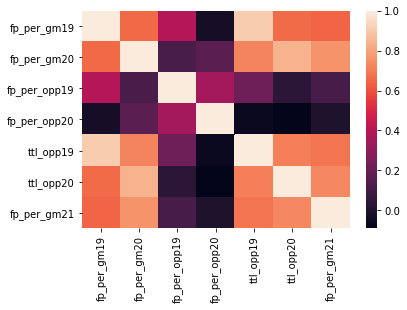

In [303]:
sns.heatmap(ff_te_pts[['fp_per_gm19','fp_per_gm20', 'fp_per_opp19', 'fp_per_opp20', 'ttl_opp19', 'ttl_opp20', 
                       'fp_per_gm21']].corr())

## Saving Current DFs to my CPU

In [304]:
ff_qb_pts.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/qb_19_21_fantasy.csv")
ff_rb_pts.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/rb_19_21_fantasy.csv")
ff_wr_pts.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/wr_19_21_fantasy.csv")
ff_te_pts.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/te_19_21_fantasy.csv")

### Idea for next notebook/dataframe to combine with this
Can we add more to these data frames, in terms of -- year in the league in '21, rookie contract or not, previous year team passing ranks, rushing ranks, qb play, OL play, etc?


### Modeling:

New notebook for that using above dataframes; may combine DFs within this notebook or new notebook

## Pre-Processing before modeling

## Initial Modeling

# need a dataset of predictor variables for final 

from bs4 import BeautifulSoup
from urllib import request


# 2022 data or testing data

r = request.get("https://www.pro-football-reference.com/years/2022/fantasy.htm").read()
soup = BeautifulSoup(website, 'lxml')

table = soup.find('table', attrs={'id': 'fantasy','class': 'per_match_toggle'})

table_headers = [header.text for header in table.find('thead').find_all('th')]
table_rows = table.find_all('tr')

player_data = [[td.getText() for tr in table_rows[i].findAll(['td','th'])] for i in table_rows]

print(table_headers)
df = pd.DataFrame(player_data,table_headers)

df.head()